# CIS 3715 Final Project

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

EData = pd.read_csv("employee_churn_data.csv")

#Initial data preprocessing. What data types are there, and are there any missing values?
print(EData.info(), "\n")
print(EData.isnull().sum())
print(EData.shape)
# print(EData)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB
None 

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64
(9540, 10)


This data has no empty values, which means that we do not have to calculate values to fill missing cells, or choose to delete any factors from this dataset. However, it does have multiple rows which are full of qualitative operators, and need to be converted to quantitative operators

Histograms of all the quantitative data from the dataset

array([[<Axes: title={'center': 'promoted'}>,
        <Axes: title={'center': 'review'}>,
        <Axes: title={'center': 'projects'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'satisfaction'}>,
        <Axes: title={'center': 'bonus'}>],
       [<Axes: title={'center': 'avg_hrs_month'}>, <Axes: >, <Axes: >]],
      dtype=object)

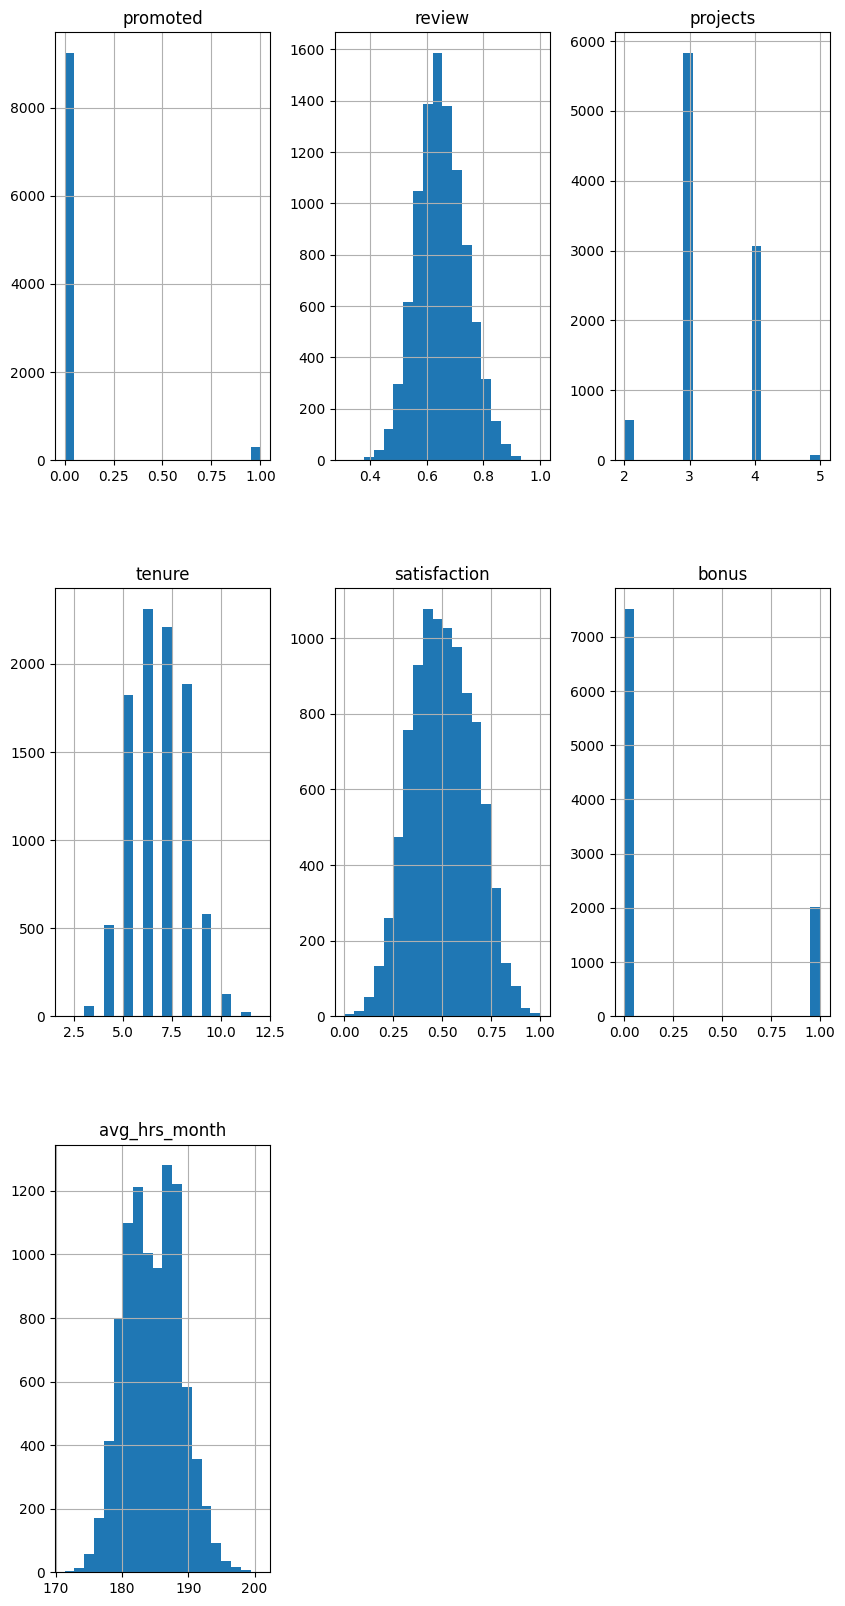

In [133]:
EData.hist(bins = 20, figsize = (10, 20))

In [134]:
#corr = EData[['department', 'salary', 'left']].corr()
#corr.style.background_gradient()
#not sure how you got this to work?

Bar Plots of the qualitative data (department, salary, and if the employee chose to leave) before label encoding

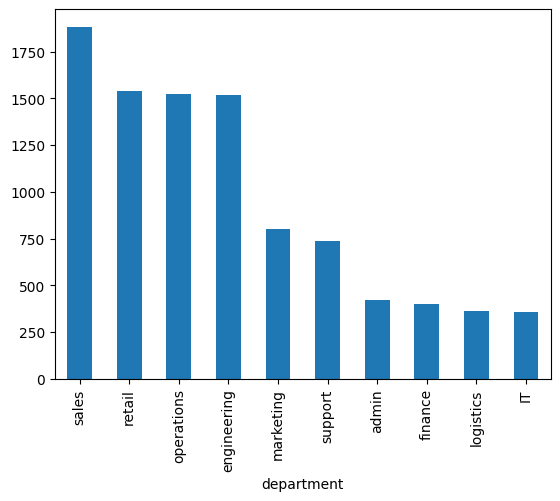

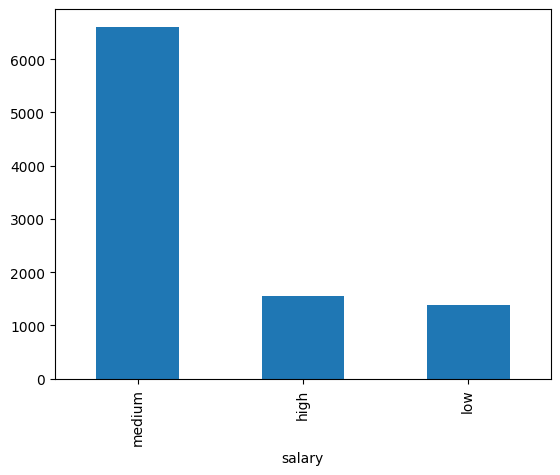

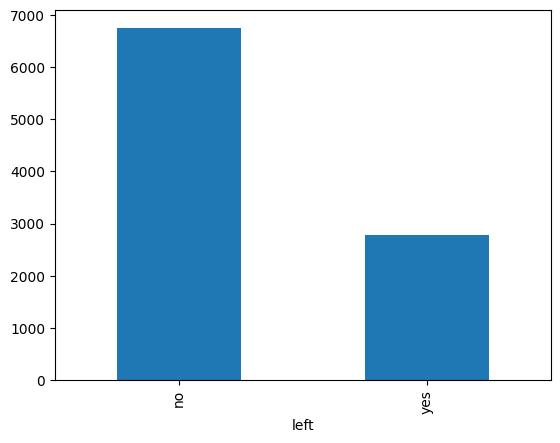

In [135]:
EData['department'].value_counts().plot(kind = 'bar')
plt.show()

EData['salary'].value_counts().plot(kind = 'bar')
plt.show()

EData['left'].value_counts().plot(kind = 'bar')
plt.show()

In [136]:
Encoder = LabelEncoder()

EData['department'] = Encoder.fit_transform(EData['department'])
# print(EData['department'].value_counts())

EData['salary'] = Encoder.fit_transform(EData['salary'])
# print(EData['salary'].value_counts())

EData['left'] = Encoder.fit_transform(EData['left'])
# print(EData['left'].value_counts())

print(EData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   int32  
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   int32  
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   int32  
dtypes: float64(4), int32(3), int64(3)
memory usage: 633.6 KB
None


Histograms of the qualitative data (department, salary, and if the employee chose to leave) after label encoding

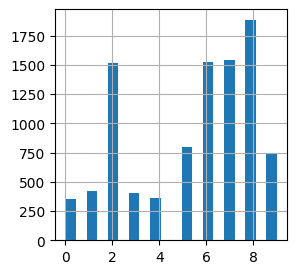

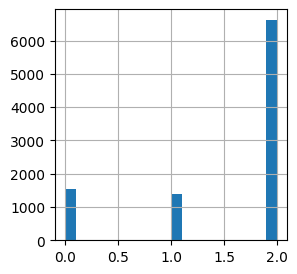

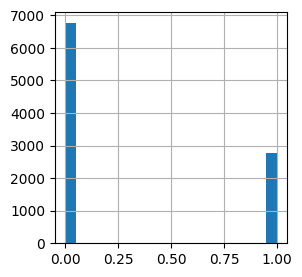

In [137]:
EData['department'].hist(bins = 20, figsize = (3,3))
plt.show()
EData['salary'].hist(bins = 20, figsize = (3,3))
plt.show()
EData['left'].hist(bins = 20, figsize = (3,3))
plt.show()

# Balancing Dataset

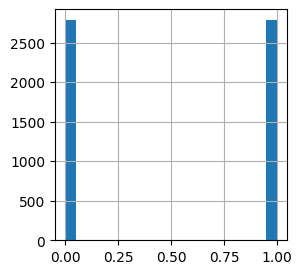

In [138]:
majority_class = EData[EData['left'] == 0]
minority_class = EData[EData['left'] == 1]

# undersampling the data to create a balanced dataset
num_samples_to_keep = len(minority_class)

# Undersample the majority class to match the number of samples in the minority class
majority_class_undersampled = resample(majority_class, replace=False, n_samples=num_samples_to_keep, random_state=42)

# Combine the undersampled majority class with the minority class
balanced_data = pd.concat([majority_class_undersampled, minority_class])

# Shuffle the balanced data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_data['left'].hist(bins = 20, figsize = (3,3))
plt.show()

# Start of Logistic model for classification

## - Splitting data into training and testing sets

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



FV = EData.drop('left', axis=1) #Features Values
GTV = EData['left'] #Ground Truth Values

B_FV = balanced_data.drop('left', axis=1) #Features Values
B_GTV = balanced_data['left'] #Ground Truth Values


print(FV.shape)
print(GTV.shape)

FV_train_val, FV_test, GTV_train_val, GTV_test = train_test_split(FV, GTV, 
                                                            test_size=0.12, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(FV_train_val.shape[0], FV_test.shape[0]))

normalizer = StandardScaler()
FV_train_val = normalizer.fit_transform(FV_train_val)
FV_test = normalizer.transform(FV_test)
#histograms of normalized data, not needed but figured I keep the code here
'''for col_idx in range(FV_train_val.shape[1]):
    plt.hist(FV_train_val[:, col_idx], bins=30, density=True, alpha=0.5)  # Adjust bins, density, and alpha as needed
    plt.xlabel(f'Value (Column {col_idx + 1})')  # Label for x-axis
    plt.ylabel('Frequency')  # Label for y-axis
    plt.title(f'Histogram - Column {col_idx + 1}')  # Title for the histogram
    plt.grid(True)  # Show grid
    plt.show()'''

(9540, 9)
(9540,)
train_val: 8395, test: 1145


"for col_idx in range(FV_train_val.shape[1]):\n    plt.hist(FV_train_val[:, col_idx], bins=30, density=True, alpha=0.5)  # Adjust bins, density, and alpha as needed\n    plt.xlabel(f'Value (Column {col_idx + 1})')  # Label for x-axis\n    plt.ylabel('Frequency')  # Label for y-axis\n    plt.title(f'Histogram - Column {col_idx + 1}')  # Title for the histogram\n    plt.grid(True)  # Show grid\n    plt.show()"

In [140]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define a range of regularization coefficients (C values)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize dictionaries to store best metric values and their corresponding C values
best_accuracy = {'Value': 0, 'C': None}
best_precision = {'Value': 0, 'C': None}
best_recall = {'Value': 0, 'C': None}
best_f1 = {'Value': 0, 'C': None}

# Perform 5-fold cross-validation
for fold_idx, (train_index, val_index) in enumerate(kf.split(FV_train_val)):
    X_train, X_val = FV_train_val[train_index], FV_train_val[val_index]
    y_train, y_val = GTV_train_val.iloc[train_index], GTV_train_val.iloc[val_index]

    # Initialize dictionaries to store evaluation metrics for each C value
    c_metrics = []

    # Iterate over each C value
    for C in C_values:
        # Initialize logistic regression model with current C value
        model = LogisticRegression(C=C)

        # Fit the model on training data
        model.fit(X_train, y_train)

        # Predict on validation data
        y_pred = model.predict(X_val)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Store evaluation metrics for this C value
        c_metrics.append({'C': C, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})

        # Update best metric values if necessary
        if accuracy > best_accuracy['Value']:
            best_accuracy['Value'] = accuracy
            best_accuracy['C'] = C
        if precision > best_precision['Value']:
            best_precision['Value'] = precision
            best_precision['C'] = C
        if recall > best_recall['Value']:
            best_recall['Value'] = recall
            best_recall['C'] = C
        if f1 > best_f1['Value']:
            best_f1['Value'] = f1
            best_f1['C'] = C

    # Store evaluation metrics for this fold
    #fold_metrics.append(c_metrics)

# Print best metric values and their corresponding C values
print('Best Accuracy:', best_accuracy)
print('Best Precision:', best_precision)
print('Best Recall:', best_recall)
print('Best F1 Score:', best_f1)

Best Accuracy: {'Value': 0.7421083978558666, 'C': 0.1}
Best Precision: {'Value': 0.8461538461538461, 'C': 0.001}
Best Recall: {'Value': 0.2401656314699793, 'C': 1}
Best F1 Score: {'Value': 0.3483483483483483, 'C': 1}


# Full Logistic Regression Model


In [141]:
clf = LogisticRegression(penalty='l2', C=best_accuracy['C'], solver='lbfgs')
clf.fit(FV_train_val, GTV_train_val)

y_test_pred = clf.predict(FV_test)

acc = accuracy_score(GTV_test, y_test_pred)
f1 = f1_score(GTV_test, y_test_pred)
recall = recall_score(GTV_test, y_test_pred)
precision = precision_score(GTV_test, y_test_pred)

print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

#accuracy went way down with full test

accuracy: 0.716, recall: 0.221, precision: 0.675, f1: 0.333,


# Cluster Methods

In [142]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
import itertools
from sklearn.metrics.cluster import normalized_mutual_info_score


# Get all combinations of features
feature_combinations = list(itertools.combinations(FV.columns, 2))

results = []

# Perform K-means clustering on each feature combination
for feature_pair in feature_combinations:
    features_subset = FV[list(feature_pair)]
    
    # Initialize KMeans with desired number of clusters
    kmeans = KMeans(n_clusters=2)
    
    # Fit KMeans model
    kmeans.fit(features_subset)
    
    # Add cluster labels to the DataFrame
    cluster_labels = kmeans.labels_
    
    # Calculate accuracy compared to ground truth
    accuracy = accuracy_score(GTV, cluster_labels)
    
    # Store the results
    results.append({
        'Features': feature_pair,
        'Cluster Labels': cluster_labels,
        'Accuracy': accuracy
    })

# Print the results
for result in results:
    if(result['Accuracy'] >= 0.60):
        print(f"Features: {result['Features']}, Accuracy: {result['Accuracy']}")

Features: ('promoted', 'review'), Accuracy: 0.689832285115304
Features: ('promoted', 'satisfaction'), Accuracy: 0.689832285115304
Features: ('promoted', 'bonus'), Accuracy: 0.6156184486373165
Features: ('review', 'tenure'), Accuracy: 0.6093291404612159
Features: ('salary', 'bonus'), Accuracy: 0.6385744234800839
Features: ('tenure', 'bonus'), Accuracy: 0.6093291404612159
Features: ('satisfaction', 'bonus'), Accuracy: 0.6156184486373165
